## Non-Linear Regression

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)
#df.tail(10)

'wget' is not recognized as an internal or external command,
operable program or batch file.


,Year,Value
45,2005,2.268599e+12
46,2006,2.729784e+12
47,2007,3.523094e+12
48,2008,4.558431e+12
49,2009,5.059420e+12
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


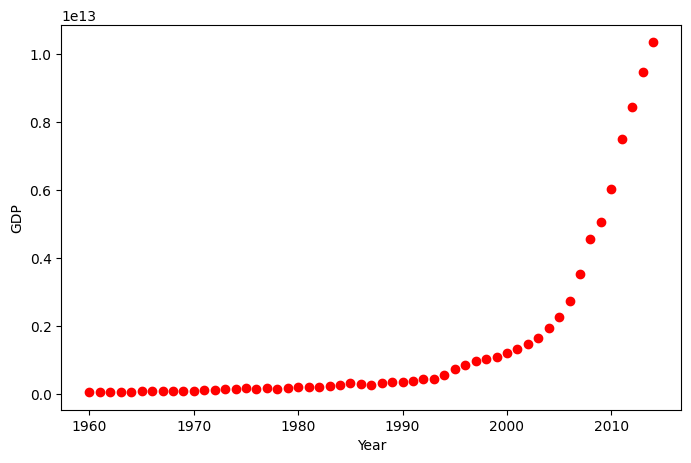

In [30]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### defining a suitable funciton for the visualized data above:

In [31]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

### Normalizing the data:


In [32]:
xdata,ydata = x_data/max(x_data), y_data/max(y_data)

### Making a train/test mask:

In [33]:
msk = np.random.rand(len(df))<0.8
train_x = xdata[msk]
test_x = xdata[~msk]

train_y = ydata[msk]
test_y = ydata[~msk]


### Build a Model on the train set:

In [34]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, train_x, train_y)

### Let's calculate the accuracy of the model on the test set:

In [35]:
from sklearn.metrics import r2_score

y_hat = sigmoid(test_x, *popt)
print(f"Mean absolute error: {np.mean(np.absolute(y_hat - test_y))}")
print(f"Residual sum of squares (MSE): {np.mean((y_hat - test_y) ** 2)}")
print(f"R2-score: {r2_score(y_hat , test_y)}")

Mean absolute error: 0.031160082108816888
Residual sum of squares (MSE): 0.0017617568074528916
R2-score: 0.9747839865176063
